In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# vaexのインストール

In [2]:
!pip install vaex

     |████████████████████████████████| 2.2MB 2.8MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 2.9MB 19.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 63.2MB 72kB/s 
     |████████████████████████████████| 4.7MB 46.6MB/s 
     |████████████████████████████████| 2.9MB 39.6MB/s 
     |████████████████████████████████| 2.8MB 61.7MB/s 
     |████████████████████████████████| 460kB 50.6MB/s 
     |████████████████████████████████| 3.1MB 50.5MB/s 
     |████████████████████████████████| 4.5MB 47.5MB/s 
     |████████████████████████████████| 1.1MB 46.4MB/s 
     |████████████████████████████████| 122kB 66.8MB/s 
     |████████████████████████████████| 665kB 55.8MB/s 
     |████████████████████████████████| 256kB 37.4MB/s 
  Created wheel for vaex: filename=vaex-2.6.1-cp36-none-any.whl size=5658 sha256=2757bcf31d4c6550360935e710b158a02c09efca01f5d1192b88138e1290b126
  Stored in director

# インポート

In [0]:
import pandas
import numpy
import vaex
import time
import os
import shutil
import glob

# ディレクトリ

保存

In [0]:
save_dir =  "/content/gdrive/My Drive/Colab Notebooks/vaexTestResult"
if not os.path.exists(save_dir):
  os.mkdir(save_dir)

作業

In [0]:
working_dir = os.path.join(os.path.expanduser('~'), "work")
if not os.path.exists(working_dir):
  os.mkdir(working_dir)
os.chdir(working_dir)

In [0]:
def fileName(row,column,suffix):
    return str(row) + "-" + str(column) + suffix

# 性能計測

In [7]:
%%time
list_of_number_of_columns = [2 ** n for n in range(10,15)]
list_of_number_of_rows = [2 ** n for n in range(10,15)]

pandas_to_csv_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
pandas_read_csv_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_from_pandas_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_export_hdf5_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_open_local_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_describe_local_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_open_gdrive_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)
vaex_describe_gdrive_records = pandas.DataFrame(index=list_of_number_of_rows, columns=list_of_number_of_columns)

CPU times: user 23.1 ms, sys: 0 ns, total: 23.1 ms
Wall time: 28.9 ms


Hdf5ファイル作成

In [8]:
%%time

for number_of_columns in list_of_number_of_columns:
  for number_of_rows in list_of_number_of_rows:
    print("-----")
    print("number_of_columns=" + str(number_of_columns))
    print("number_of_rows=" + str(number_of_rows))
    column_names = [ 'f' + str(n) for n in range(0,number_of_columns)]
    values = []
    for k in range(number_of_columns):
      values.append(numpy.random.normal(k,1, number_of_rows))
    %time df_pandas_trans = pandas.DataFrame(numpy.reshape(values, (number_of_columns, number_of_rows)), index=column_names)
    df_pandas = df_pandas_trans.T
    print(df_pandas.shape)
    
    csv_filename = fileName(number_of_rows,number_of_columns,".csv")
    hdf5_filename = fileName(number_of_rows,number_of_columns,".hdf5")

    # pandas.to_csv
    startTime = time.time()
    %time df_pandas.to_csv(csv_filename)
    endTime = time.time()
    diffTime = endTime - startTime
    pandas_to_csv_records.at[number_of_rows,number_of_columns] = diffTime
    print("pandas.to_csv")
    print(diffTime)
    
    # pandas.read_csv
    startTime = time.time()
    %time df_pandas = pandas.read_csv(csv_filename)
    endTime = time.time()
    diffTime = endTime - startTime
    pandas_read_csv_records.at[number_of_rows,number_of_columns] = diffTime
    print("pandas.read_csv")
    print(diffTime)
    
    # vaex.from_pandas
    startTime = time.time()
    %time df_vaex = vaex.from_pandas(df_pandas)
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_from_pandas_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.from_pandas")
    print(diffTime)

    # vaex.export_hdf5
    startTime = time.time()
    %time df_vaex.export_hdf5(hdf5_filename)
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_export_hdf5_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.export_hdf5")
    print(diffTime)

    df_vaex.close_files()
    
    save_filename = os.path.join(save_dir, csv_filename)
    if os.path.exists(save_filename):
      os.remove(save_filename)
    shutil.move(csv_filename, save_filename)

-----
number_of_columns=1024
number_of_rows=1024
CPU times: user 3.05 ms, sys: 1.02 ms, total: 4.07 ms
Wall time: 4.08 ms
(1024, 1024)
CPU times: user 1.81 s, sys: 70.1 ms, total: 1.88 s
Wall time: 1.89 s
pandas.to_csv
1.8932647705078125
CPU times: user 271 ms, sys: 22.1 ms, total: 293 ms
Wall time: 293 ms
pandas.read_csv
0.2940187454223633
CPU times: user 133 ms, sys: 181 µs, total: 133 ms
Wall time: 133 ms
vaex.from_pandas
0.13414454460144043
CPU times: user 1.92 s, sys: 116 ms, total: 2.03 s
Wall time: 2.15 s
vaex.export_hdf5
2.146247148513794
-----
number_of_columns=1024
number_of_rows=2048
CPU times: user 6.88 ms, sys: 0 ns, total: 6.88 ms
Wall time: 6.89 ms
(2048, 1024)
CPU times: user 3.52 s, sys: 148 ms, total: 3.66 s
Wall time: 3.67 s
pandas.to_csv
3.670868158340454
CPU times: user 493 ms, sys: 26.6 ms, total: 519 ms
Wall time: 519 ms
pandas.read_csv
0.5201301574707031
CPU times: user 132 ms, sys: 1.79 ms, total: 134 ms
Wall time: 134 ms
vaex.from_pandas
0.13549494743347168
CP

vaex利用(ローカルディスク)

In [9]:
%%time
for number_of_columns in list_of_number_of_columns:
  for number_of_rows in list_of_number_of_rows:
    print("-----")
    print("number_of_columns=" + str(number_of_columns))
    print("number_of_rows=" + str(number_of_rows))
 
    hdf5_filename = fileName(number_of_rows,number_of_columns, ".hdf5")

    # vaex.open
    startTime = time.time()
    %time df_vaex = vaex.open(hdf5_filename)
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_open_local_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.open.local")
    print(diffTime)

    # vaex.describe
    startTime = time.time()
    %time df_vaex.describe()
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_describe_local_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.describe.local")
    print(diffTime)
    
    df_vaex.close_files()

-----
number_of_columns=1024
number_of_rows=1024
CPU times: user 424 ms, sys: 36.1 ms, total: 460 ms
Wall time: 657 ms
vaex.open.local
0.658090353012085
CPU times: user 6.69 s, sys: 107 ms, total: 6.8 s
Wall time: 7.19 s
vaex.describe.local
7.187653541564941
-----
number_of_columns=1024
number_of_rows=2048
CPU times: user 700 ms, sys: 77.7 ms, total: 778 ms
Wall time: 5.45 s
vaex.open.local
5.455069541931152
CPU times: user 7.02 s, sys: 95.4 ms, total: 7.11 s
Wall time: 8.81 s
vaex.describe.local
8.80864429473877
-----
number_of_columns=1024
number_of_rows=4096
CPU times: user 544 ms, sys: 33.3 ms, total: 578 ms
Wall time: 2.56 s
vaex.open.local
2.5588762760162354
CPU times: user 7.21 s, sys: 105 ms, total: 7.31 s
Wall time: 12.7 s
vaex.describe.local
12.700645446777344
-----
number_of_columns=1024
number_of_rows=8192
CPU times: user 435 ms, sys: 10 ms, total: 445 ms
Wall time: 465 ms
vaex.open.local
0.4656026363372803
CPU times: user 7.5 s, sys: 141 ms, total: 7.65 s
Wall time: 13.7 s

結果保存

In [10]:
%%time
def moveGlob(src_path_pattern, dst_path, recursive=True):
    for f in glob.glob(src_path_pattern, recursive=recursive):
        dest_filename = os.path.join(dst_path, f)
        if os.path.exists(dest_filename):
          os.remove(dest_filename)
        shutil.move(f, dst_path)
        
moveGlob("*.hdf5", save_dir)

CPU times: user 3.42 s, sys: 8.45 s, total: 11.9 s
Wall time: 2min 6s


vaex利用(Google Drive)

In [11]:
%%time
for number_of_columns in list_of_number_of_columns:
  for number_of_rows in list_of_number_of_rows:
    print("-----")
    print("number_of_columns=" + str(number_of_columns))
    print("number_of_rows=" + str(number_of_rows))
 
    hdf5_filename = os.path.join(save_dir, fileName(number_of_rows,number_of_columns, ".hdf5"))

    # vaex.open
    startTime = time.time()
    %time df_vaex = vaex.open(hdf5_filename)
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_open_gdrive_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.open.gdrive")
    print(diffTime)

    # vaex.describe
    startTime = time.time()
    %time df_vaex.describe()
    endTime = time.time()
    diffTime = endTime - startTime
    vaex_describe_gdrive_records.at[number_of_rows,number_of_columns] = diffTime
    print("vaex.describe.gdrive")
    print(diffTime)
    
    df_vaex.close_files()

-----
number_of_columns=1024
number_of_rows=1024
CPU times: user 473 ms, sys: 21.1 ms, total: 494 ms
Wall time: 539 ms
vaex.open.gdrive
0.5399222373962402
CPU times: user 7.22 s, sys: 346 ms, total: 7.56 s
Wall time: 7.58 s
vaex.describe.gdrive
7.582916498184204
-----
number_of_columns=1024
number_of_rows=2048
CPU times: user 456 ms, sys: 19.1 ms, total: 475 ms
Wall time: 525 ms
vaex.open.gdrive
0.5259506702423096
CPU times: user 6.47 s, sys: 42.5 ms, total: 6.51 s
Wall time: 6.52 s
vaex.describe.gdrive
6.524855375289917
-----
number_of_columns=1024
number_of_rows=4096
CPU times: user 479 ms, sys: 27.2 ms, total: 506 ms
Wall time: 576 ms
vaex.open.gdrive
0.5765745639801025
CPU times: user 6.45 s, sys: 84.3 ms, total: 6.53 s
Wall time: 6.56 s
vaex.describe.gdrive
6.559494972229004
-----
number_of_columns=1024
number_of_rows=8192
CPU times: user 499 ms, sys: 26.8 ms, total: 526 ms
Wall time: 608 ms
vaex.open.gdrive
0.608574390411377
CPU times: user 6.62 s, sys: 71.2 ms, total: 6.69 s
Wal

In [12]:
%%time
def saveRecord(records, filename):
  records.to_csv(os.path.join(save_dir,filename))

saveRecord(pandas_to_csv_records, "pandas_to_csv.csv")
saveRecord(pandas_read_csv_records, "pandas_read_csv.csv")
saveRecord(vaex_from_pandas_records, "vaex_from_pandas.csv")
saveRecord(vaex_export_hdf5_records, "vaex_export_hdf5.csv")
saveRecord(vaex_open_local_records, "vaex_open_local.csv")
saveRecord(vaex_describe_local_records, "vaex_describe_local.csv")
saveRecord(vaex_open_gdrive_records, "vaex_open_gdrive.csv")
saveRecord(vaex_describe_gdrive_records, "vaex_describe_gdrive.csv")

CPU times: user 8.8 ms, sys: 3.05 ms, total: 11.8 ms
Wall time: 1.21 s


pandas.read_csvの時間

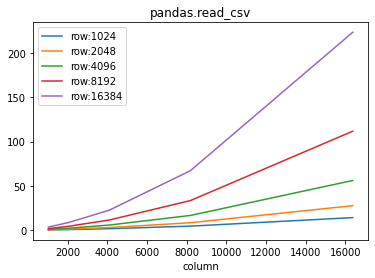

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("pandas.read_csv")
plt.xlabel("column")

for row_number in list_of_number_of_rows:
  line_label = "row:"+ str(row_number)
  x = list_of_number_of_columns
  y = pandas_read_csv_records.loc[row_number,:]
  plt.plot(x,y, label=line_label)
plt.legend()

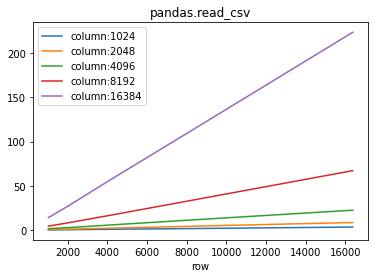

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("pandas.read_csv")
plt.xlabel("row")

for column_number in list_of_number_of_columns:
  line_label = "column:"+ str(column_number)
  x = list_of_number_of_rows
  y = pandas_read_csv_records.loc[:,column_number]
  plt.plot(x,y, label=line_label)
plt.legend()

vaex.open (ローカルディスク)

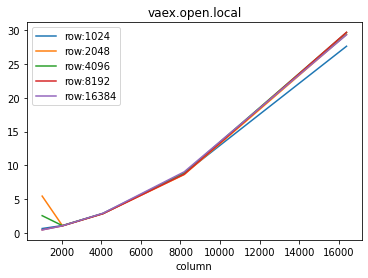

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.open.local")
plt.xlabel("column")

for row_number in list_of_number_of_rows:
  line_label = "row:"+ str(row_number)
  x = list_of_number_of_columns
  y = vaex_open_local_records.loc[row_number,:]
  plt.plot(x,y, label=line_label)
plt.legend()

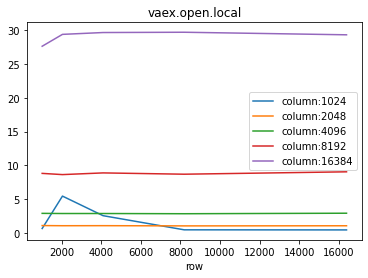

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.open.local")
plt.xlabel("row")

for column_number in list_of_number_of_columns:
  line_label = "column:"+ str(column_number)
  x = list_of_number_of_rows
  y = vaex_open_local_records.loc[:,column_number]
  plt.plot(x,y, label=line_label)
plt.legend()

vaex.open(Google Drive)

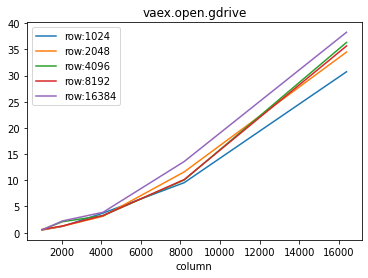

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.open.gdrive")
plt.xlabel("column")

for row_number in list_of_number_of_rows:
  line_label = "row:"+ str(row_number)
  x = list_of_number_of_columns
  y = vaex_open_gdrive_records.loc[row_number,:]
  plt.plot(x,y, label=line_label)
plt.legend()

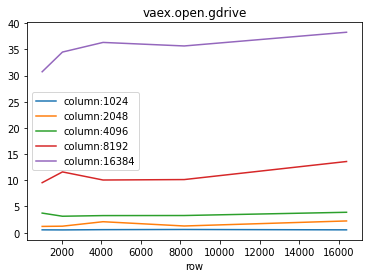

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.open.gdrive")
plt.xlabel("row")

for column_number in list_of_number_of_columns:
  line_label = "column:"+ str(column_number)
  x = list_of_number_of_rows
  y = vaex_open_gdrive_records.loc[:,column_number]
  plt.plot(x,y, label=line_label)
plt.legend()

vaex.describe計算時間(ローカルディスク)

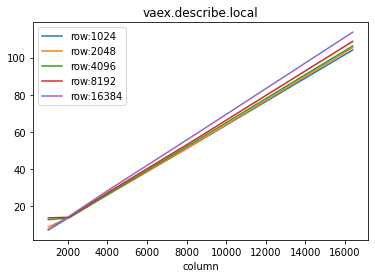

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.describe.local")
plt.xlabel("column")

for row_number in list_of_number_of_rows:
  line_label = "row:"+ str(row_number)
  x = list_of_number_of_columns
  y = vaex_describe_local_records.loc[row_number,:]
  plt.plot(x,y, label=line_label)
plt.legend()

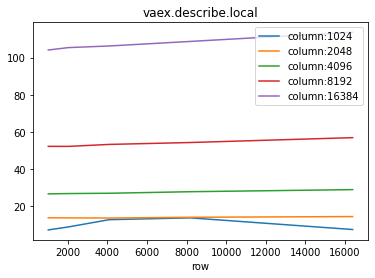

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.describe.local")
plt.xlabel("row")

for column_number in list_of_number_of_columns:
  line_label = "column:"+ str(column_number)
  x = list_of_number_of_rows
  y = vaex_describe_local_records.loc[:,column_number]
  plt.plot(x,y, label=line_label)
plt.legend()

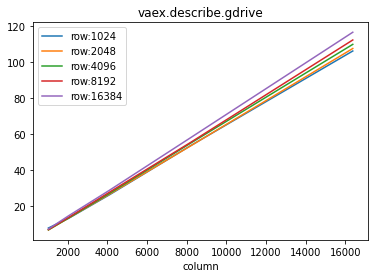

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.describe.gdrive")
plt.xlabel("column")

for row_number in list_of_number_of_rows:
  line_label = "row:"+ str(row_number)
  x = list_of_number_of_columns
  y = vaex_describe_gdrive_records.loc[row_number,:]
  plt.plot(x,y, label=line_label)
plt.legend()

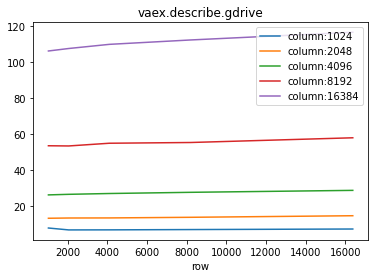

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("vaex.describe.gdrive")
plt.xlabel("row")

for column_number in list_of_number_of_columns:
  line_label = "column:"+ str(column_number)
  x = list_of_number_of_rows
  y = vaex_describe_gdrive_records.loc[:,column_number]
  plt.plot(x,y, label=line_label)
plt.legend()

vaex.describe計算時間(Google Drive)

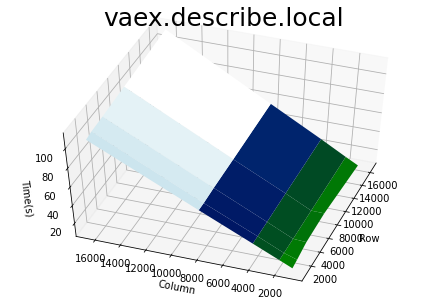

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(list_of_number_of_rows, list_of_number_of_columns, indexing='ij')
Z =  vaex_describe_local_records.to_numpy(dtype='float')
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("vaex.describe.local", fontsize=25)
ax.set_xlabel("Row")
ax.set_ylabel("Column")
ax.set_zlabel("Time(s)")
ax.view_init(elev=50, azim=-160)
ax.plot_surface(X, Y, Z, cmap='ocean')
plt.show()

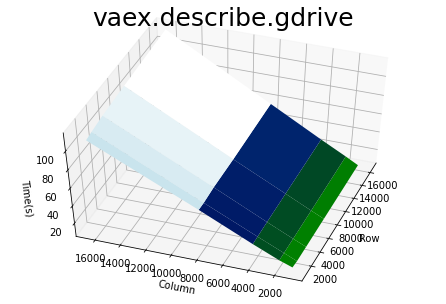

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X, Y = np.meshgrid(list_of_number_of_rows, list_of_number_of_columns, indexing='ij')
Z =  vaex_describe_gdrive_records.to_numpy(dtype='float')
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("vaex.describe.gdrive", fontsize=25)
ax.set_xlabel("Row")
ax.set_ylabel("Column")
ax.set_zlabel("Time(s)")
ax.view_init(elev=50, azim=-160)
ax.plot_surface(X, Y, Z, cmap='ocean')
plt.show()

# ノートブックの保存
すべてのセルを実行するようにして、放置してColabのセッションが切れるとしても、最終的に実行後のノートブックが確実に保存されるようにする。

In [25]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>